# Our First Graph

In [ ]:
# specify the imports 
from typing import TypedDict
from langgraph.graph import StateGraph

In [5]:
# Create a Type dictionary
class AgentState(TypedDict):
    message: str

# create a node that uses the typed dictionary and returns a type dictionary
#in this instance the dictionary "state" creates and returns a greeting
def greeting_node(state:AgentState)->AgentState:
    """Simple message that adds a greeting to the state """
    state["message"]="Hey "+state["message"] + " How is your day" 
    return state
    

In [10]:
# create a stategraph to expect a TypedDict AgentState
graph = StateGraph(AgentState)

GREET="greater" # a label for any node created

#add the node to the graph
graph.add_node(GREET, greeting_node)
#set the entry and finish point for the graph
graph.set_entry_point(GREET)
graph.set_finish_point(GREET)
#compile the graph
app = graph.compile()

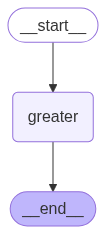

In [12]:
# use the iPython Library to visualize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
# get the result of the app
result = app.invoke({"message":"Emmanuel"})

In [17]:
result

{'message': 'Hey Emmanuel How is your day'}